<a href="https://colab.research.google.com/github/regisalbuquerque/projeto_pesquisa_ti/blob/main/Testes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métricas de Teste

**Acurácia**: Mede o quão frequente um classificador está correto?

```
Acurácia = quantidade de acerto / (quantidade de acertos - quantidade de erros)
```

**Matriz de Confusão**: Consiste em uma tabela que permite visualizar o desempenho de um algoritmo de classificação. As linhas da matriz representam instâncias de uma classe prevista enquanto as colunas representa instâncias da classe atual. Ela permite fazermos uma análise mais detalhada da situação do nosso classificador uma vez que ela distingue nossos resultados em quatro classes. Para um problema relacionado a identificação se determinado e-mail é spam ou não:

```
*   Verdadeiros Positivos(True positive): casos em que retornamos a classe SPAM e o e-mail realmente era de spam.
*   Falsos positivos(False positives): casos em que retornamos a classe SPAM e na verdade eram e-mails comuns.
*   Falsos Verdadeiros (True Negative): casos que retornamos que era e-mail comum (ausência de spam) e realmente eram.
*   Falsos Negativos (False Negative): retornamos que não eram spam e na verdade eram spam.

```

**Precisão**: De todas as classificações de classe Positivo que o modelo fez, quantas estão corretas? A fórmula é dada por:

```
Precisão = Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Positivo)
```

**Recall (Revocação)**: Entre todas as amostras que realmente eram de uma classe, qual a proporção classificada como da classe. A fórmula é dada por:

```
Recall = Verdadeiros Positivos / (Verdadeiros Positivos + Falsos Negativos)
```

**F1-Score**: Consiste na média harmônica entre precisão e recall. Esta medida une precisão e recall em apenas uma medida.

```
F1 = 2 * precisão * recall / (precisão + recall)
```


# TestThanTrain

Para testar os classificadores com aprendizado em stream nas mais diversas bases selecionamos a técnica TestThanTrain. 

# TESTES

In [2]:
pip install river

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 31.8 MB/s 


In [3]:
from river import tree
from river import metrics
from river import datasets
import matplotlib.pyplot as plt

dataset_Phissing = datasets.Phishing()
dataset_SMTP = datasets.SMTP()
dataset_SMSSpam = datasets.SMSSpam()


In [ ]:
dataset_SMTP

SMTP dataset from the KDD 1999 cup.

The goal is to predict whether or not an SMTP connection is anomalous or not. The dataset only
contains 2,211 (0.4%) positive labels.

      Name  SMTP                                                
      Task  Binary classification                               
   Samples  95,156                                              
  Features  3                                                   
    Sparse  False                                               
      Path  /root/river_data/SMTP/smtp.csv                      
       URL  https://maxhalford.github.io/files/datasets/smtp.zip
      Size  5.23 MB                                             
Downloaded  False                                               

------------------------------------------------
DataSet:  Phishing websites.
Classifier:  HoeffdingTreeClassifier
Accuracy: 87.99%
Matriz de Confusão:
        False   True  
False     636     66  
 True      84    463  
Precision: 87.52%
Recall: 84.64%
F1: 86.06%
           Precision   Recall   F1       Support  
                                                  
   False      88.33%   90.60%   89.45%       702  
    True      87.52%   84.64%   86.06%       547  
                                                  
   Macro      87.93%   87.62%   87.76%            
   Micro      87.99%   87.99%   87.99%            
Weighted      87.98%   87.99%   87.97%            

                 87.99% accuracy                  


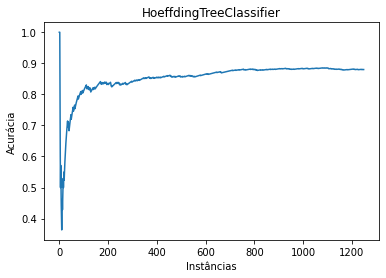

------------------------------------------------
------------------------------------------------
DataSet:  Phishing websites.
Classifier:  HoeffdingAdaptiveTreeClassifier
Accuracy: 87.75%
Matriz de Confusão:
        False   True  
False     617     85  
 True      68    479  
Precision: 84.93%
Recall: 87.57%
F1: 86.23%
           Precision   Recall   F1       Support  
                                                  
   False      90.07%   87.89%   88.97%       702  
    True      84.93%   87.57%   86.23%       547  
                                                  
   Macro      87.50%   87.73%   87.60%            
   Micro      87.75%   87.75%   87.75%            
Weighted      87.82%   87.75%   87.77%            

                 87.75% accuracy                  


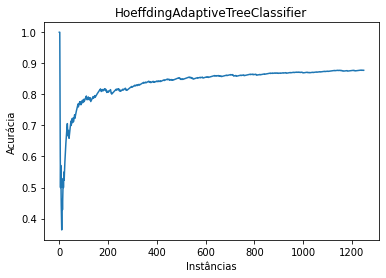

------------------------------------------------
------------------------------------------------
DataSet:  Phishing websites.
Classifier:  ExtremelyFastDecisionTreeClassifier
Accuracy: 88.79%
Matriz de Confusão:
        False   True  
False     626     76  
 True      64    483  
Precision: 86.40%
Recall: 88.30%
F1: 87.34%
           Precision   Recall   F1       Support  
                                                  
   False      90.72%   89.17%   89.94%       702  
    True      86.40%   88.30%   87.34%       547  
                                                  
   Macro      88.56%   88.74%   88.64%            
   Micro      88.79%   88.79%   88.79%            
Weighted      88.83%   88.79%   88.80%            

                 88.79% accuracy                  


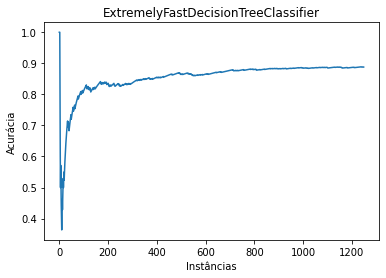

------------------------------------------------


In [4]:
from river import tree
from river import metrics
from river import datasets
import pandas as pd
import matplotlib.pyplot as plt

dataset_Phissing = datasets.Phishing()
dataset_SMTP = datasets.SMTP()
dataset_SMSSpam = datasets.SMSSpam()


modelHTC = tree.HoeffdingTreeClassifier()
modelHATC = tree.HoeffdingAdaptiveTreeClassifier(seed=1)
modelEFDT = tree.ExtremelyFastDecisionTreeClassifier()

datasets = [dataset_Phissing]
classifiers = [modelHTC, modelHATC, modelEFDT]

def test_than_train(dataset, model):
    acuracias = []

    metric_acuracia = metrics.Accuracy()
    metric_m_confusao = metrics.ConfusionMatrix()
    metric_precisao = metrics.Precision()
    metric_recall = metrics.Recall()
    metric_f1 = metrics.F1()
    metric_report = metrics.ClassificationReport()

    for x, y in dataset:
        y_pred = model.predict_one(x)
        model.learn_one(x, y)
        if y_pred is not None:
            acuracias.append(metric_acuracia.update(y, y_pred).get())
            metric_m_confusao.update(y, y_pred)
            metric_precisao.update(y, y_pred)
            metric_recall.update(y, y_pred)
            metric_f1.update(y, y_pred)
            metric_report.update(y, y_pred)


    print("------------------------------------------------")
    print("DataSet: ", dataset.desc.partition('\n')[0])
    print("Classifier: ", model)

    print(metric_acuracia)
    print("Matriz de Confusão:")
    print(metric_m_confusao)
    print(metric_precisao)
    print(metric_recall)
    print(metric_f1)
    print(metric_report)

    # Plotagem da Acurácia com o decorrer do tempo 
    plt.plot(acuracias)
    plt.title(model)
    plt.ylabel('Acurácia')
    plt.xlabel('Instâncias')
    plt.show()
    
    print("------------------------------------------------")
    
    model.draw()

for dataset in datasets:
  for model in classifiers:
    test_than_train(dataset, model)



REFERÊNCIAS

MONTIEL, Jacob et al. River: machine learning for streaming data in Python. 2021.

TAVALLAEE, Mahbod et al. A detailed analysis of the KDD CUP 99 data set. In: 2009 IEEE symposium on computational intelligence for security and defense applications. Ieee, 2009. p. 1-6.